# eksperimen k-means clustering
disini saya mencoba bereksperimen sendiri berdasarkan materi pdf cluster k-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## dataset awal

In [2]:
# data: (x, y)
data = np.array([
    [2, 5.0],  # M1
    [2, 5.5],  # M2
    [5, 3.5],  # M3
    [6.5, 2.2],# M4
    [7, 3.3],  # M5
    [3.5, 4.8],# M6
    [4, 4.5]   # M7
])
df = pd.DataFrame(data, columns=["x", "y"])
df.index = [f"M{i}" for i in range(1, 8)]
df


,x,y
M1,2.0,5.0
M2,2.0,5.5
M3,5.0,3.5
M4,6.5,2.2
M5,7.0,3.3
M6,3.5,4.8
M7,4.0,4.5


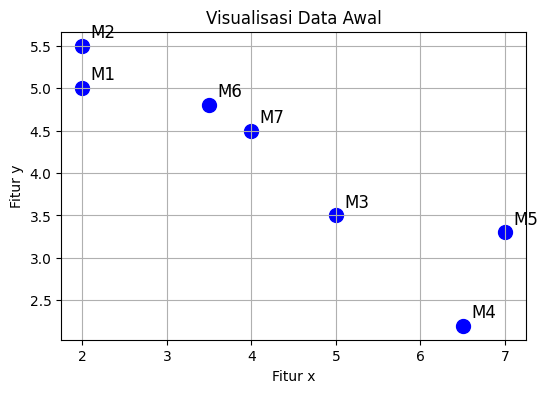

In [3]:
# visualisasi data
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c='blue', s=100)
for i, (x, y) in enumerate(data, 1):
    plt.text(x + 0.1, y + 0.1, f"M{i}", fontsize=12)
plt.title("Visualisasi Data Awal")
plt.xlabel("Fitur x")
plt.ylabel("Fitur y")
plt.grid(True)
plt.show()


## standardisasi data

In [4]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std


array([[-1.23626785,  0.82703432],
       [-1.23626785,  1.29390853],
       [ 0.3863337 , -0.57358832],
       [ 1.19763448, -1.78746127],
       [ 1.46806808, -0.760338  ],
       [-0.42496708,  0.64028463],
       [-0.15453348,  0.36016011]])

## menentukan jumlah cluster optimal (elbow method)

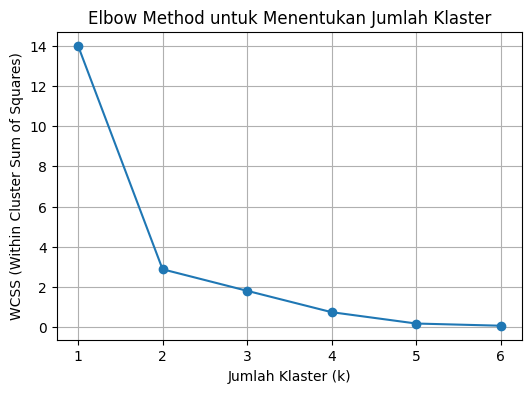

In [5]:
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 7), wcss, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.grid(True)
plt.show()


## clustering k=2

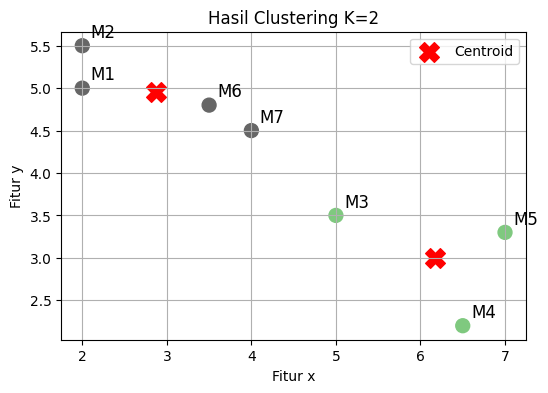

In [6]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels_2 = kmeans_2.fit_predict(data_std)
centers_2 = scaler.inverse_transform(kmeans_2.cluster_centers_)

# visualisasi hasil cluster
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], c=labels_2, cmap='Accent', s=100)
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, marker='X', label='Centroid')
for i, (x, y) in enumerate(data, 1):
    plt.text(x + 0.1, y + 0.1, f"M{i}", fontsize=12)
plt.title("Hasil Clustering K=2")
plt.xlabel("Fitur x")
plt.ylabel("Fitur y")
plt.legend()
plt.grid(True)
plt.show()
